In [1]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import pickle

In [2]:
def calcular_error(y_test, y_pred):
    
    ## MEAN ABSOLUTE ERROR
    mae = MAE(y_test.flatten(), y_pred.flatten())

    ##MEAN SQUARE ERROR
    mse = MSE(y_test.flatten(), y_pred.flatten())

    ## root mean square error
    rmse = np.sqrt(mse)

    return mae, mse, rmse

In [3]:
def cargar_dataset(path_x, path_y, shuffle):
    if(shuffle == 0):
        Y = np.load(path_y)
        Y_next = np.zeros((19287, 137, 157))

        # Obtenemos lluvias en tiempo t + 1 
        for i in range(Y_next.shape[0]):
            Y_next[i] = Y[i+1]
        Y = None

        # carga dataset x_test e y_test
        X = np.load(path_x)
        X_test = X[16395:19287, :, :, :]
        X = None
        Y_test =  Y_next[16395:, :, :]
        Y_next = None
        
    elif(shuffle == 1):
        X_test = np.load(path_x)
        Y_test = np.load(path_y)
        
    # Recorte para obtener 128x144
    X_test = X_test[:, :, 0:128, 0:144]
    Y_test = Y_test[:, 0:128, 0:144]
    Y_test = np.expand_dims(Y_test, axis=1)
    
    # Muevo el eje RGB al ultimo
    X_test = np.moveaxis(X_test, 1, 3)
    Y_test = np.moveaxis(Y_test, 1, 3)
    
    return X_test, Y_test

### opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) / loss=mae
### Presion: 700 mb / 100 epochs

In [5]:
path_x = "/opt/datos/dataset/gfs/wind/X_rain700.npy"
path_y = "/opt/datos/dataset/gfs/Y.npy"

X_test, Y_test = cargar_dataset(path_x, path_y, 0) #0: sin shuffle
model = load_model("/opt/datos/entrenamientos/gfs/wind/05/model.h5")
y_pred = model.predict(X_test) #Unet

mae0, mse0, rmse0 = calcular_error(Y_test, y_pred)
print(f'MAE: {mae0}')
print(f'MSE: {mse0}')
print(f'RMSE: {rmse0}')

MAE: 0.2695359301278098
MSE: 1.1750986019923908
RMSE: 1.0840196501873898


### opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) / loss=mae
### Presion: 850 mb / 100 epochs

In [40]:
path_x = "/opt/datos/dataset/gfs/wind/X_rain850.npy"
path_y = "/opt/datos/dataset/gfs/Y.npy"

X_test, Y_test = cargar_dataset(path_x, path_y, 0) #0: sin shuffle
model = load_model("/opt/datos/entrenamientos/gfs/wind/06/model.h5")
y_pred = model.predict(X_test) #Unet

mae1, mse1, rmse1 = calcular_error(Y_test, y_pred)
print(f'MAE: {mae1}')
print(f'MSE: {mse1}')
print(f'RMSE: {rmse1}')

MAE: 0.2587255057561211
MSE: 1.1303129430670253
RMSE: 1.0631617671206133


### opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) / loss=mae
### Presion: 700 mb / 100 epochs / Shuffle

In [7]:
path_x = "/opt/datos/dataset/gfs/wind/shuffle/X_test700.npy"
path_y = "/opt/datos/dataset/gfs/wind/shuffle/Y_test700.npy"

X_test, Y_test = cargar_dataset(path_x, path_y, 1) #1: con shuffle
model = load_model("/opt/datos/entrenamientos/gfs/wind/07/model.h5")
y_pred = model.predict(X_test) #Unet

mae2, mse2, rmse2 = calcular_error(Y_test, y_pred)
print(f'MAE: {mae2}')
print(f'MSE: {mse2}')
print(f'RMSE: {rmse2}')

MAE: 0.2930285185208875
MSE: 1.5177329115308786
RMSE: 1.2319630317224939


### opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) / loss=mae
### Presion: 850 mb / 100 epochs / Shuffle

In [8]:
path_x = "/opt/datos/dataset/gfs/wind/shuffle/X_test850.npy"
path_y = "/opt/datos/dataset/gfs/wind/shuffle/Y_test700.npy"

X_test, Y_test = cargar_dataset(path_x, path_y, 1) #1: con shuffle
model = load_model("/opt/datos/entrenamientos/gfs/wind/08/model.h5")
y_pred = model.predict(X_test) #Unet

mae3, mse3, rmse3 = calcular_error(Y_test, y_pred)
print(f'MAE: {mae3}')
print(f'MSE: {mse3}')
print(f'RMSE: {rmse3}')

MAE: 0.28525064587573684
MSE: 1.4169670749292402
RMSE: 1.1903642614465708


## Comparacion Errores

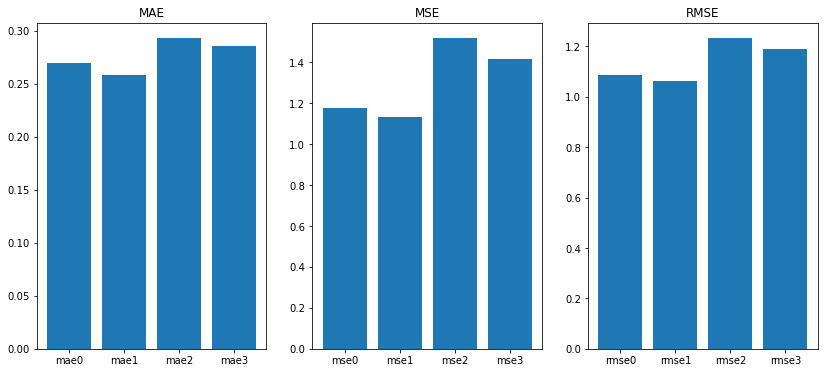

In [22]:
array_mae = {'mae0':mae0, 'mae1':mae1, 'mae2':mae2, 'mae3':mae3}
array_mse = {'mse0':mse0, 'mse1':mse1, 'mse2':mse2, 'mse3':mse3}
array_rmse = {'rmse0':rmse0, 'rmse1':rmse1, 'rmse2':rmse2, 'rmse3':rmse3}

plt.figure(figsize=(14,6))
plt.subplot(131), plt.bar(array_mae.keys(), array_mae.values()), plt.title('MAE')
plt.subplot(132), plt.bar(array_mse.keys(), array_mse.values()), plt.title('MSE')
plt.subplot(133), plt.bar(array_rmse.keys(), array_rmse.values()), plt.title('RMSE')
plt.show()

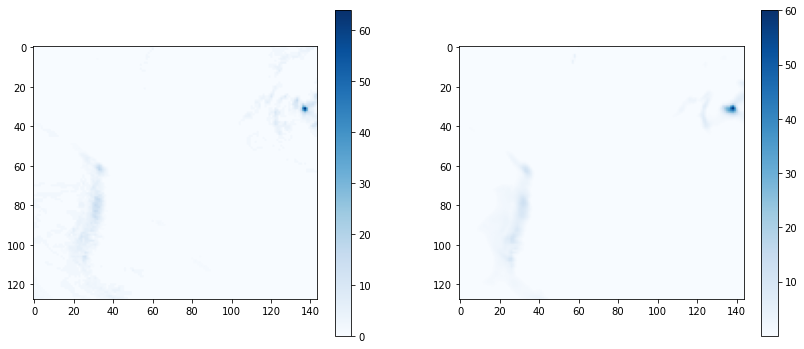

In [39]:
n=750
plt.figure(figsize=(14,6))
plt.subplot(121), plt.imshow(Y_test[n], cmap='Blues'), plt.colorbar()
plt.subplot(122), plt.imshow(y_pred[n], cmap='Blues'), plt.colorbar()
plt.show()

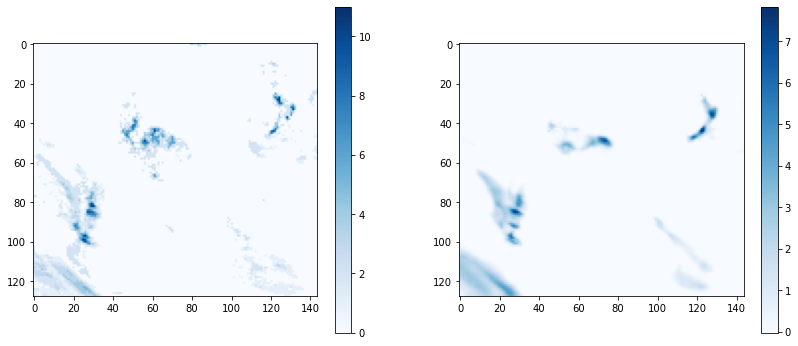

In [68]:
n=639
plt.figure(figsize=(14,6))
plt.subplot(121), plt.imshow(Y_test[n], cmap='Blues'), plt.colorbar()
plt.subplot(122), plt.imshow(y_pred[n], cmap='Blues'), plt.colorbar()
plt.show()